# Thermal physics
- θερμός -> warm
- study of transfer of energy from 1 object to another.

## 1) State of matter

    *********   * ** *  *        *   
    *********    * *  *         
    *********    *  *  *    *       *
      solid      liquid        gas

### Solid
- molecules vibrate around fixed position
- bonds linking molecules prevent motion

### Liquid
- molecules vibrate around position which is no longer fixed
- takes the shape of its contianer

### Gas
- takes shape of container
- molecules are free to move around -> no more bonds

For all states of matter, as temperature increases, so does the vibration / motion of molecules.


### `Temperature` $\propto$ the average kinetic energy of molecules

Internal energy
- potential nergy (bonds)
- kinetic (vibration, motion)

| water | state  | temperature | energy | what happens |
|-------|--------|-------------|--------|--------------|
|`.....`| solid  | 1K          | $E_k$+ | vibrate more |
|`.....`| solid  | 100K        | $E_k$+ | vibrate more |
|`. .. `| melting| 273K        | $E_p$+ ($E_p < 0$)| separate bonds (temperature does **not** change)|
|`. .. `| liquid | 300K        | $E_k$+ | vibrate more |
|` .   `| boiling| 373K        | $E_p$+ ($E_p = 0$)|...|
|` .   `| gas    | 450K        | $E_k$+ | motion increases|


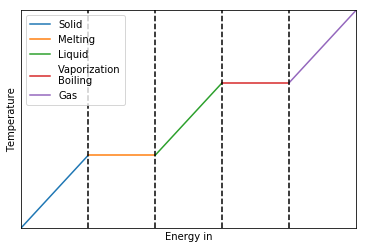

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot([0, 1], [0, 2])
plt.plot([1, 2], [2, 2])
plt.plot([2, 3], [2, 4])
plt.plot([3, 4], [4, 4])
plt.plot([4, 5], [4, 6])
for i in range(1, 5):
    plt.plot([i, i], [0, 6], '--k')
plt.xticks([])
plt.yticks([])
plt.xlim([0, 5])
plt.ylim([0, 6])
plt.xlabel('Energy in')
plt.ylabel('Temperature')
plt.legend(['Solid', 'Melting', 'Liquid', 'Vaporization\nBoiling', 'Gas'])
plt.show()

### Beware:
Vaporisation ≠ evaporation

Evaporation
- particles with higher than average $E_k$ escape from surface
- $E_k$- => $T$-

In [2]:
{
    'Solid': {
        'Liquid': 'Melting',
        'Gas': 'Sublimation'
    },
    'Liquid': {
        'Solid': 'Freezing',
        'Gas': 'Vaporization'
    },
    'Gas': {
        'Solid': 'Deposition',
        'Liquid': 'Condensation'
    }
}

{'Gas': {'Liquid': 'Condensation', 'Solid': 'Deposition'},
 'Liquid': {'Gas': 'Vaporization', 'Solid': 'Freezing'},
 'Solid': {'Gas': 'Sublimation', 'Liquid': 'Melting'}}

### `Specific latent heat of fusion` $L_f$ & `Specific latent heat of vaporisation` $L_v$
measures of how much energy 1kg of matter needs to completely melt / vaporize.

- ${L_f}_{ice} = 333.5 kJ/kg$
- ${L_v}_{water} = 2260 kJ/kg$

### `Specific heat capacity`
amount of energy of energy required to increase the temperature of 1 kg of matter by 1 K.

- $C_{water} = 4187 kJ/kgK$
- $C_{ice} = 2108 kJ/kgK$
- Heater: 500 W

How long to completely vaporize 200g of ice at 268K.

$E = Q_{ice} + Q_{melting} + Q_{water} + Q_{vaporization} \\ = 0.2 \times 2108 \times (273 - 268)  + 0.2 \times 333.5 + 0.2 \times 4187 \times (373 - 273) + 0.2 \times 2260 \\ = 86366.7 kJ$

$E = \frac{P}{t} \Leftrightarrow t = \frac{E}{P}$

$t = \frac{86367 KJ}{500 W} \\ = 172733.4 s \\ = 2878.89 min \\ = 47.8915 h \\ = 1.9992 day$

$Q = m L$
$Q = m c \Delta T$

## Ideal Gas equation
$P V = n R T$

### Boyle's Law
$P \propto \frac{1}{V} \Leftrightarrow PV = k$

### Charle's Law
$V \propto T \Leftrightarrow \frac{V}{T} = k \Leftrightarrow \frac{T}{V} = k'$

### Gay-Lussac's Law (GL)
$P \propto T \Leftrightarrow \frac{P}{T} = k$

Find out heat capacity of water by melting ice in water.

$\theta_f = \frac{\theta_w \times m_w + \theta_i \times m_i}{m_t} = \frac{\theta_w \times m_w}{m_t}$  
$m_w c \Delta T = m_i L$ where $\Theta T = \theta_0 - \theta_w$  
$\Rightarrow c = \frac{m_i L}{m_w \Delta T}$ where $\theta_w = \frac{\theta_f \times m_t}{m_w}$

In [9]:
def find_c(m_water, m_ice, t_0, t_f):
    L = 335  # latent heat of fusion of ice (J/g)
    Q = m_ice * L
    t_final_water = t_f * (m_water + m_ice) / m_water
    d_t = t_0 - t_final_water
    return Q / (m_water * d_t)

In [10]:
find_c(250, 50.07, 21.6, 11.7)

8.878688701611965

In [11]:
find_c(250, 20.00, 20.9, 15.4)

6.279287722586695

In [12]:
find_c(250, 100.00, 20.2, 3.3)

8.600770218228499

In [14]:
def find_c_delta(m_water, m_water_d, m_ice, m_ice_d, t_0, t_0_d, t_f, t_f_d):
    d_t = t_0 - t_f * (m_water + m_ice) / m_water
    c_percentage_d = m_ice_d / m_ice + m_water_d / m_water + (t_0_d + (t_f * (m_water + m_ice) / m_water) * (t_f_d / t_f + m_ice_d / m_ice + 2 * m_water_d / m_water)) / d_t
    return c_percentage_d, c_percentage_d * find_c(m_water, m_ice, t_0, t_f)

In [15]:
find_c_delta(250, 25, 50.07, 5, 21.6, 0.1, 11.7, 0.1)

(0.2417842600583927, 1.9448723687643779)

In [16]:
find_c_delta(250, 25, 20.00, 5, 20.9, 0.1, 15.4, 0.1)

(2.1523430178069365, 13.515181086510294)

In [17]:
find_c_delta(250, 25, 100.0, 5, 20.2, 0.1, 3.3, 0.1)

(0.2395378690629012, 2.0602101703741185)

The molecules that make up an ideal gas ...
- are identical perfect spheres
- are perfectly elastic - they don't lose any kinetic energy during their collisions with each other, or the walls of their container
- have no intermolecular forces - their potential energy does not change
- are so small that their volume is much smaller than the volume of their container.